In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_rf = pd.read_csv("df_cbg_lsa.csv")

In [3]:
df_rf

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..CBG
0,3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0.042471
1,3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0.042471
2,7,0.401841,-0.062527,-0.018128,-0.104475,0.009215,1,0,0,0,...,0,1,0,0,0,0,1,1,1,0.042471
3,11,0.260672,-0.019644,0.215790,-0.106098,0.058930,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0.042471
4,13,0.276418,-0.133986,0.116293,0.073694,0.041143,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.042471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.335907
74996,42973,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.335907
74997,42975,0.324915,0.131823,-0.099424,0.065491,0.038437,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.335907
74998,42975,0.324915,0.131823,-0.099424,0.065491,0.038437,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.335907


In [4]:
df_rf.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

Splitting dependent and independent variables

In [5]:
X = df_rf.drop(['index', 'X..CBG'], axis = 1)
y = df_rf[['X..CBG']]

Plotting histograms on target variable

In [6]:
y_array = y.to_numpy()
y_array

array([[0.04247104],
       [0.04247104],
       [0.04247104],
       ...,
       [0.33590734],
       [0.33590734],
       [0.33590734]])

<AxesSubplot:ylabel='Count'>

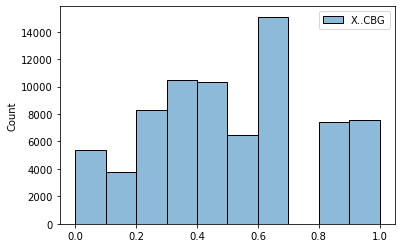

In [7]:
sns.histplot(y, bins = 10)

Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [9]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

RF modeling (before Feature selection and Hyperparameter Tuning)

In [10]:
rfreg = RandomForestRegressor(n_jobs = -1)
rfreg.fit(X_train1, y_train1)

/var/folders/y1/pjvjlkjn5gl846rnyzr53p340000gn/T/ipykernel_13572/119766249.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


RandomForestRegressor(n_jobs=-1)

In [11]:
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

In [12]:
mean_absolute_error(y_val, y_pred_rfreg)

0.02591102119341499

In [13]:
mean_squared_error(y_val, y_pred_rfreg)

0.004270100429235825

In [14]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.06534600545737915

In [15]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9893017444447618

In [16]:
#val
r2_score(y_val, y_pred_rfreg)

0.9408728580908643

Residual plots for each target variable

Feature Selection

In [17]:
df_feat = pd.DataFrame({
    "features": X_train1.columns,
    "score": rfreg.feature_importances_
})

In [18]:
df_feat

,features,score
0,lsa_0,0.086070
1,lsa_1,0.051088
2,lsa_2,0.046742
3,lsa_3,0.074858
4,lsa_4,0.045160
...,...,...
81,tree,0.001445
82,tropical,0.010783
83,vanilla,0.004101
84,violet,0.001420


In [19]:
df_feat_ranked = df_feat.sort_values("score", ascending=False)

In [20]:
pd.set_option('display.max_rows', df_feat_ranked.shape[0]+1)
df_feat_ranked

,features,score
41,berry,0.208172
76,strawberry,0.106375
6,indica,0.086147
0,lsa_0,0.086070
3,lsa_3,0.074858
1,lsa_1,0.051088
2,lsa_2,0.046742
4,lsa_4,0.045160
7,sativa,0.039672
43,blueberry,0.023507


In [21]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [22]:
selector.estimator_.feature_importances_

array([8.58182138e-02, 5.11167061e-02, 4.67329524e-02, 7.59930836e-02,
       4.43731703e-02, 1.17643379e-02, 8.58040825e-02, 3.91530579e-02,
       6.48769838e-05, 9.21470847e-04, 3.13181273e-03, 0.00000000e+00,
       3.91534530e-03, 7.60537446e-05, 1.27950374e-03, 2.66155222e-03,
       4.43950816e-03, 2.86572520e-03, 0.00000000e+00, 3.75580038e-03,
       0.00000000e+00, 0.00000000e+00, 9.98716835e-03, 3.36110387e-03,
       4.35413181e-03, 9.56402014e-04, 5.37157466e-03, 7.52796806e-05,
       0.00000000e+00, 2.50793221e-03, 6.01455593e-03, 0.00000000e+00,
       3.72736298e-03, 3.25243766e-06, 0.00000000e+00, 4.07014837e-03,
       2.59693873e-03, 5.43531126e-03, 3.10353791e-04, 2.23800189e-04,
       1.34609454e-03, 2.07802982e-01, 1.33060948e-03, 2.29065214e-02,
       1.32645692e-04, 8.91327867e-03, 1.03297855e-03, 1.38756954e-04,
       6.92160228e-03, 3.57163042e-04, 1.24846389e-02, 6.06906080e-03,
       2.59401130e-03, 1.69631248e-03, 1.36897604e-02, 4.04938563e-03,
      

In [23]:
selector.threshold_

0.011627906976744184

In [24]:
mask = selector.get_support()

In [25]:
mask

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False])

In [26]:
selected_features = X.columns[mask]

In [27]:
selected_X = df_rf[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,berry,blueberry,diesel,grape,lemon,strawberry,tropical
0,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,0,0,1,0,0,0
1,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,0,0,1,0,0,0
2,0.401841,-0.062527,-0.018128,-0.104475,0.009215,1,0,0,0,0,0,0,0,0,0
3,0.260672,-0.019644,0.215790,-0.106098,0.058930,1,0,0,0,0,0,0,0,0,0
4,0.276418,-0.133986,0.116293,0.073694,0.041143,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,0,0,0,0,0,0
74996,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,0,0,0,0,0,0
74997,0.324915,0.131823,-0.099424,0.065491,0.038437,0,1,0,0,0,0,0,0,0,0
74998,0.324915,0.131823,-0.099424,0.065491,0.038437,0,1,0,0,0,0,0,0,0,0


Train test split (after Feature Selection)

In [28]:
import joblib

joblib.dump(selector, "selector_rf_lsa_elbow_cbg.pkl")
joblib.dump(selected_X, "selected_X_rf_lsa_elbow_cbg.pkl")

['selected_X_rf_lsa_elbow_cbg.pkl']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [30]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [31]:
rfreg.fit(X_train1, y_train1)
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

/var/folders/y1/pjvjlkjn5gl846rnyzr53p340000gn/T/ipykernel_13572/3758305.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


In [32]:
mean_absolute_error(y_val, y_pred_rfreg)

0.02766457254357544

In [33]:
mean_squared_error(y_val, y_pred_rfreg)

0.004609821684973624

In [34]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.06789566764509812

In [35]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9832789787926216

In [36]:
#val
r2_score(y_val, y_pred_rfreg)

0.9359968613062435

Hyperparameter Tuning

In [37]:
parameters = { 'max_depth': [None, 10, 50, 100],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100, 300, 500]}

In [38]:
rscv = RandomizedSearchCV(rfreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs= -1)

In [39]:
rscv.fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/mod

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 50, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   scoring='neg_mean_absolute_error')

In [40]:
rscv.best_params_

{'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100}

In [41]:
joblib.dump(rscv, "rscv_rf_lsa_elbow_cbg.pkl")
joblib.dump(rscv.best_params_, "rscv_rf_lsa_elbow_best_params_cbg.pkl")

['rscv_rf_lsa_elbow_best_params_cbg.pkl']

RF (after Hyperparameter Tuning)

In [42]:
rfreg_ht = RandomForestRegressor(n_estimators = 300, min_samples_split = 5, max_features = 'sqrt', min_samples_leaf = 1, max_depth = 100)
rfreg_ht.fit(X_train1, y_train1)
y_pred_rfreg = rfreg_ht.predict(X_val)
y_pred_rfreg_r2 = rfreg_ht.predict(X_train1)

/var/folders/y1/pjvjlkjn5gl846rnyzr53p340000gn/T/ipykernel_13572/387795715.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg_ht.fit(X_train1, y_train1)


In [43]:
mean_absolute_error(y_val, y_pred_rfreg)

0.03151080194021649

In [44]:
mean_squared_error(y_val, y_pred_rfreg)

0.004663857107111929

In [45]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.06829243814004542

In [46]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9768724774616642

In [47]:
#val
r2_score(y_val, y_pred_rfreg)

0.9352466291164027

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [48]:
y_pred_rfreg_test = rfreg_ht.predict(X_test)

In [49]:
joblib.dump(y_pred_rfreg_test, "y_pred_rfreg_test_lsa_elbow_cbg.pkl")
joblib.dump(y_test, "y_test_rfreg_lsa_elbow_cbg.pkl")

['y_test_rfreg_lsa_elbow_cbg.pkl']

In [50]:
mean_absolute_error(y_test, y_pred_rfreg_test)

0.03165177006050512

In [51]:
mean_squared_error(y_test, y_pred_rfreg_test)

0.0047613704247683845

In [52]:
mean_squared_error(y_test, y_pred_rfreg_test, squared = False)

0.069002684185243

In [53]:
r2_score(y_test, y_pred_rfreg_test)

0.9345013040822776

Error analysis

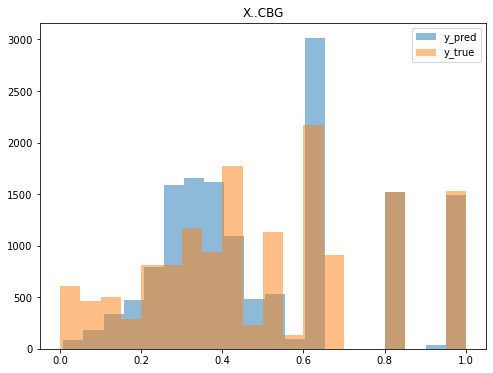

<Figure size 432x288 with 0 Axes>

In [54]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..CBG"  # specify the target variable name
ax.hist(y_pred_rfreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_rf_lsa_elbow_cbg.png')

Pearson R

In [55]:
corr_coef, p_value = pearsonr(y_pred_rfreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.968
P-value: 0.000


<AxesSubplot:>

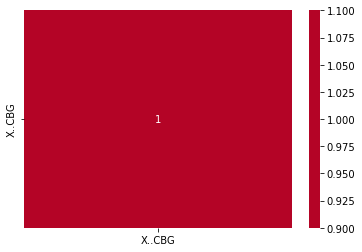

In [56]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)